In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import os
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import time
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [10]:
xtrain = xtrain.reshape(60000, 784) 
xtrain = xtrain.astype(np.float32)
xtrain /= 255
xtest = xtest.reshape(10000, 784)
xtest = xtest.astype(np.float32)
xtest/= 255
# Number of classes, one class for each of 10 digits.
num_classes = 10
ytest = np_utils.to_categorical(ytest,num_classes)
ytrain = np_utils.to_categorical(ytrain,num_classes)

In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using SGD
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 31s - loss: 0.4079 - acc: 0.8763 - val_loss: 0.2288 - val_acc: 0.9316
Epoch 2/20
 - 26s - loss: 0.2209 - acc: 0.9343 - val_loss: 0.1845 - val_acc: 0.9447
Epoch 3/20
 - 26s - loss: 0.1867 - acc: 0.9441 - val_loss: 0.2021 - val_acc: 0.9407
Epoch 4/20
 - 26s - loss: 0.1710 - acc: 0.9481 - val_loss: 0.1787 - val_acc: 0.9445
Epoch 5/20
 - 26s - loss: 0.1580 - acc: 0.9517 - val_loss: 0.1632 - val_acc: 0.9507
Epoch 6/20
 - 26s - loss: 0.1488 - acc: 0.9563 - val_loss: 0.1635 - val_acc: 0.9527
Epoch 7/20
 - 30s - loss: 0.1421 - acc: 0.9571 - val_loss: 0.1611 - val_acc: 0.9501
Epoch 8/20
 - 26s - loss: 0.1352 - acc: 0.9596 - val_loss: 0.1608 - val_acc: 0.9526
Epoch 9/20
 - 26s - loss: 0.1308 - acc: 0.9603 - val_loss: 0.1686 - val_acc: 0.9497
Epoch 10/20
 - 26s - loss: 0.1245 - acc: 0.9627 - val_loss: 0.1791 - val_acc: 0.9508
Epoch 11/20
 - 27s - loss: 0.1212 - acc: 0.9635 - val_loss: 0

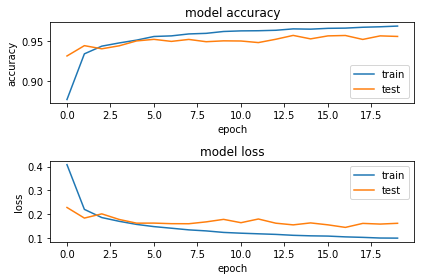

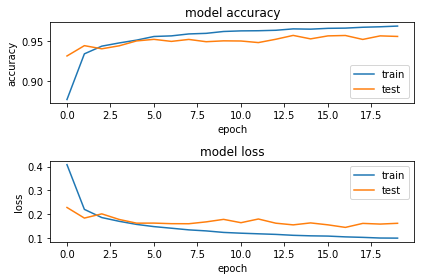

In [11]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig

In [64]:
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./results/keras_mnist.h5 


In [65]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(xtest, ytest, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.21953517661467195
Test Accuracy 0.934


In [13]:
optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 29s - loss: 0.0987 - acc: 0.9698 - val_loss: 0.1452 - val_acc: 0.9598
Epoch 2/20
 - 27s - loss: 0.0975 - acc: 0.9695 - val_loss: 0.1529 - val_acc: 0.9564
Epoch 3/20
 - 27s - loss: 0.0957 - acc: 0.9701 - val_loss: 0.1562 - val_acc: 0.9577
Epoch 4/20
 - 26s - loss: 0.0952 - acc: 0.9705 - val_loss: 0.1812 - val_acc: 0.9491
Epoch 5/20
 - 27s - loss: 0.0946 - acc: 0.9703 - val_loss: 0.1621 - val_acc: 0.9539
Epoch 6/20
 - 26s - loss: 0.0917 - acc: 0.9713 - val_loss: 0.1608 - val_acc: 0.9547
Epoch 7/20
 - 27s - loss: 0.0909 - acc: 0.9716 - val_loss: 0.1525 - val_acc: 0.9584
Epoch 8/20
 - 29s - loss: 0.0900 - acc: 0.9718 - val_loss: 0.1606 - val_acc: 0.9571
Epoch 9/20
 - 32s - loss: 0.0896 - acc: 0.9723 - val_loss: 0.1668 - val_acc: 0.9553
Epoch 10/20
 - 28s - loss: 0.0870 - acc: 0.9723 - val_loss: 0.1627 - val_acc: 0.9576
Epoch 11/20
 - 42s - loss: 0.0868 - acc: 0.9728 - val_loss: 0.1524 - val_acc: 0.9590
Epoch 12/20
 - 34s - los

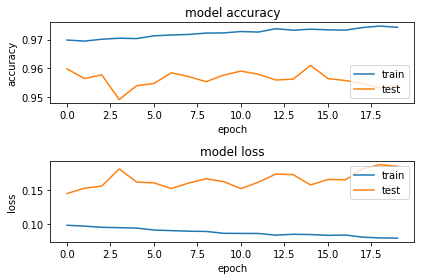

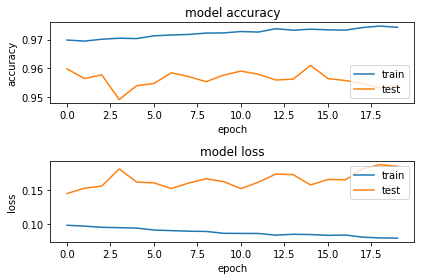

In [14]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig